In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

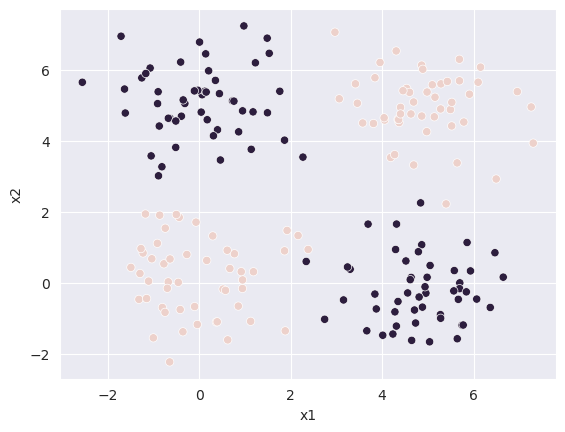

In [3]:
centers = [[0, 5], [0, 0], [5, 5], [5, 0]]
(x, y) = make_blobs(n_samples=[50,50, 50, 50], n_features=2, random_state=0,centers=centers)
df = pd.DataFrame(data=x, columns=['x1', 'x2'])
df['y'] = y
df = df.replace(1,2)
df = df.replace(0,3)
sns.scatterplot(data=df, x='x1', y='x2', hue='y', legend=False)
plt.show();

In [4]:
from  tensorflow import keras
from tensorflow.keras import layers

2024-03-01 05:40:52.868505: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 05:40:52.868536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 05:40:52.869322: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 05:40:52.874246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-01 05:40:53.446345: W tensorflow/com

In [5]:
model = keras.Sequential([
    layers.Dense(3, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(2, activation="relu"),
    layers.Dense(1, activation="sigmoid")

])

2024-03-01 05:40:53.897024: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-01 05:40:53.911559: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-01 05:40:53.911730: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

InternalError: cudaSetDevice() on GPU:0 failed. Status: out of memory

In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# train model
np.random.seed(12)
history = model.fit(x = df[["x1", "x2"]],
                    y = df["y"],
                    epochs=5,
                    batch_size=8)


In [ ]:
def visualize_decision_boundaries1(model, x_range, y_range):
    xx, yy = np.meshgrid(np.linspace(x_range[0], x_range[1], 500), np.linspace(y_range[0], y_range[1], 500))
    sns_map = ListedColormap(np.array(sns.color_palette()))
    y_hat=model.predict(np.c_[xx.ravel(), yy.ravel()])
    y_hat=y_hat.reshape(xx.shape)
    
    cs = plt.contourf(xx, yy, y_hat, cmap=sns_map)
    plt.xlabel("fare")
    plt.ylabel("age")

visualize_decision_boundaries1(model, [-2, 21], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
plt.show();

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
np.random.seed(12)
history = model.fit(x = df[["x1", "x2"]],
                    y = df["y"],
                    epochs=20,
                    batch_size=8)

In [ ]:
visualize_decision_boundaries1(model, [-2, 21], [-2, 2])
sns.scatterplot(data = df, x = "x1", y = "x2", hue = "y", legend = False)
plt.show();